In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load gambar
image_path = "data/original_dataset_utama/train/healthy/Train_1001.jpg"
image = cv2.imread(image_path)

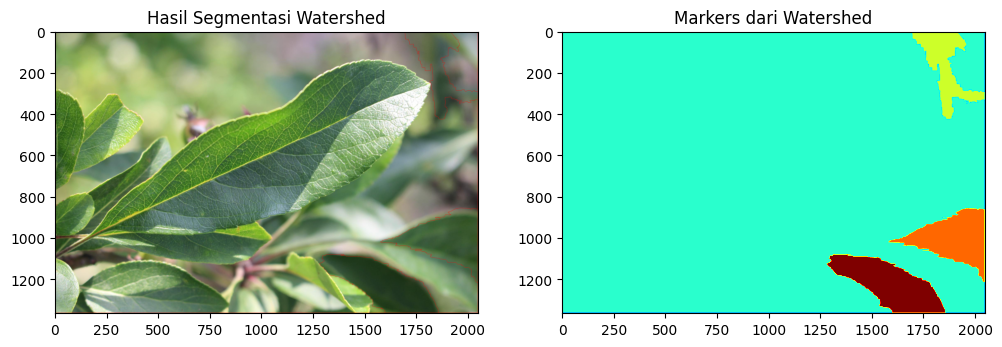

In [9]:
# Convert gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menggunakan threshold untuk membedakan objek dari background
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Menggunakan Morphological Transformations untuk menghilangkan noise
# Membuat kernel untuk dilasi
kernel = np.ones((3, 3), np.uint8)

# Morphological opening untuk menghilangkan noise di background
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Dilasi untuk mendapatkan background yang lebih besar
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Menggunakan Distance Transform untuk mendapatkan area foreground yang pasti
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Mendapatkan area yang tidak pasti (garis pemisah)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Memberi label pada marker
ret, markers = cv2.connectedComponents(sure_fg)

# Menambahkan 1 ke semua marker agar background menjadi 1
markers = markers + 1

# Menandai area yang tidak diketahui dengan 0
markers[unknown == 255] = 0

# Menerapkan watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Batas objek ditandai dengan warna merah

# Menampilkan hasil segmentasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Hasil Segmentasi Watershed")
plt.subplot(1, 2, 2), plt.imshow(markers, cmap='jet'), plt.title("Markers dari Watershed")
plt.show()